<a href="https://colab.research.google.com/github/MeT3ger/Numba_Sort/blob/main/OMP_Bub_sort_numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Подключение библиотек

* 1. Random
* 2. Numba - Numba-это JIT-компилятор с открытым исходным кодом, который переводит подмножество Python и NumPy в быстрый машинный код с использованием LLVM через пакет llvmlite Python.

* 3. time - Библиотека для замера времени
* 4. matplotlib - библиотека на языке программирования Python для визуализации данных двумерной и трёхмерной графикой.
* 5. numpy - (сокращенно от Numerical Python)— библиотека с открытым исходным кодом для языка программирования Python.
* 6. %matplotlib inline - бэкэнд для вывод команд построения графика отображается во внешних интерфейсах, непосредственно под ячейкой кода, которая его создала. Полученные графики также будут сохранены.

In [100]:
from random import randint
import numba
from numba import njit
import time
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()
import numpy as np
from numba.typed import List

In [123]:
def decorator_function(func):
    def wrapper(n:int):
        print('Далее будет создан список размера {} и отсортирован'.format(n))
        func(n)
        print('Выше вы можете видеть скорость сортировки')
    return wrapper
  

def paint(arr, N):
  fig, ax = plt.subplots(figsize=(5, 2.7))
  ax.scatter(list(x for x in range(N)), arr, s=1, facecolor='C0', edgecolor='k')

## Alghoritm bubble sort Numba

In [106]:
@njit  #(parallel=True,fastmath = True)
def bubble_sort(a:list):
  i = 0
  while i < N - 1:
      j = 0
      while j < N - 1 - i:
          if a[j] > a[j+1]:
              a[j], a[j+1] = a[j+1], a[j]
          j += 1
      i += 1

@decorator_function
def Bubble_sort_numba(N:int):
  for i in range(N):
      a.append(randint(1, 99))
  start = time.time()
  bubble_sort(a)
  end = time.time()
  print(end-start)

N = 5000
Bubble_sort_numba(N)

Далее будет создан список размера 5000 и отсортирован


/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'a' of function 'bubble_sort'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-106-663df938965f>", line 2:
@njit  #(parallel=True,fastmath = True)
def bubble_sort(a:list):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


0.5455241203308105
Выше вы можете видеть скорость сортировки


Далее будет создан список размера 5000 и отсортирован
0.0003819465637207031
Выше вы можете видеть скорость сортировки


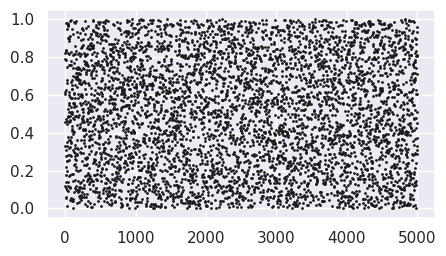

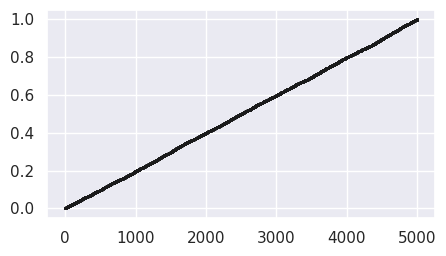

In [126]:
@decorator_function
def Bubble_sort_numpy(N:int):
  Arr_ = np.random.rand(N)
  paint(Arr_,N)

  start = time.time()
  Arr_.sort()
  end = time.time()
  print(end-start)
  paint(Arr_,N)

N = 5000


Bubble_sort_numpy(N)


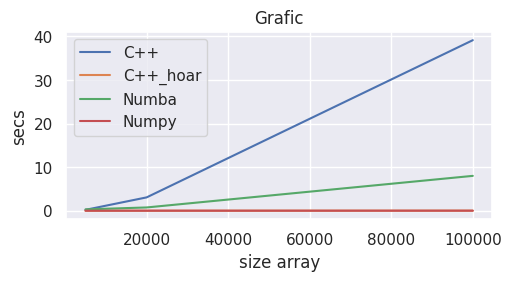

In [127]:
x = [5000,20000,100000]
y_C = [0.205, 3.062, 39.125]
y_C_hoar = [0.0012, 0.0058, 0.0173]
y_Numba = [0.311, 0.750, 7.9966]
y_Numpy = [0.0003, 0.0015, 0.0084]

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, y_C, label='C++')
ax.plot(x, y_C_hoar, label = "C++_hoar")
ax.plot(x, y_Numba, label='Numba')
ax.plot(x, y_Numpy, label='Numpy')
ax.set_xlabel('size array')  
ax.set_ylabel('secs')  
ax.set_title("Grafic")  
ax.legend()

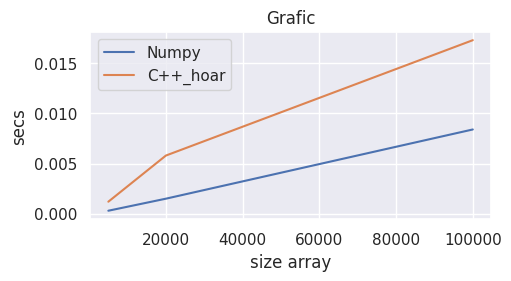

In [128]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, y_Numpy, label='Numpy')
ax.plot(x, y_C_hoar, label = "C++_hoar")
ax.set_xlabel('size array')
ax.set_ylabel('secs')
ax.set_title("Grafic")
ax.legend()